In [1]:
%load_ext autoreload
%autoreload 2

In [417]:
import pandas as pd
from import_data_example import get_demand, get_gen, get_mcp, get_vre
from environment import market_env
from actor_critic import ActorCriticAgent
import numpy as np
import torch

In [287]:
start = pd.Timestamp(year=2020, month=1, day=1, tz="europe/brussels")
end = pd.Timestamp.now(tz="europe/brussels").floor('D') + pd.Timedelta(days=1)

In [347]:
df_demand, df_demand_scaled = get_demand(start, end)
df_vre, df_vre_scaled = get_vre(start, end)
df_gen, df_gen_scaled = get_gen(start, end)
df_mcp = get_mcp(start, end)

KeyboardInterrupt: 

In [449]:
# Example usage
env = market_env(demand=df_demand_scaled, re = df_vre_scaled, prices = df_mcp, eps_length=24, capacity=200, mc=35)

# Assuming you have a gym environment called 'env'
input_size = env.observation_space.shape[0]
n_actions = env.action_space.n
n_games = 1000

agent = ActorCriticAgent(input_size, n_actions)

filename = 'power_plant.png'

figure_file = 'plots/' + filename

best_score = env.reward_range[0]
score_history = []
load_checkpoint = False

/Users/louis.skowronek/miniforge3/envs/bda_env/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [452]:
reward_history = []

if load_checkpoint:
    agent.load_models()

for i in range(n_games):
    observation = env.reset()
    done = False
    score = 0

    while not done:

        action = agent.choose_action(observation)

        observation_next, reward, done, _ = env.step(action)
        score += reward
        if not load_checkpoint:
            agent.update(observation, reward, observation_next, done)
        observation = observation_next

    score_history.append(score)
    avg_score = np.mean(score_history[-100:])

    if avg_score > best_score:
        best_score = avg_score
        if not load_checkpoint:
            agent.save_models()

    print('episode ', i, 'score %.1f' % score, 'avg_score %.1f' % avg_score)

episode  0 score 185.9 avg_score 154.5
episode  1 score 83.4 avg_score 153.5
episode  2 score -12.1 avg_score 153.7
episode  3 score 235.3 avg_score 154.1
episode  4 score 269.3 avg_score 158.6
episode  5 score 0.0 avg_score 156.2
episode  6 score 238.3 avg_score 156.2
episode  7 score -31.3 avg_score 154.4
episode  8 score 271.0 avg_score 154.8
episode  9 score 66.5 avg_score 153.3
episode  10 score 6.8 avg_score 154.0
episode  11 score 272.9 avg_score 154.4
episode  12 score 279.0 avg_score 155.3
episode  13 score -82.4 avg_score 152.1
episode  14 score 239.3 avg_score 152.0
episode  15 score 66.7 avg_score 151.5
episode  16 score -72.6 avg_score 148.4
episode  17 score 187.8 avg_score 148.3
episode  18 score 223.6 avg_score 148.3
episode  19 score 223.6 avg_score 152.2
episode  20 score -126.5 avg_score 149.1
episode  21 score 199.8 avg_score 148.6
episode  22 score 239.7 avg_score 148.9
episode  23 score -115.2 avg_score 147.3
episode  24 score 220.5 avg_score 146.9
episode  25 sco

In [453]:
env.results_ep.describe()

,reward,market price,bid price,bid volume
count,24553.000000,24553.000000,24553.000000,24553.0
mean,6.104382,121.564164,15.444874,200.0
std,6.344194,121.357754,16.084363,0.0
min,-8.725200,-83.940000,0.000000,200.0
25%,6.082200,37.740000,14.000000,200.0
50%,9.105000,80.380000,14.000000,200.0
75%,10.197100,169.490000,14.000000,200.0
max,12.026900,871.000000,343.000000,200.0


In [441]:
agent.action

tensor(13)

<Axes: >

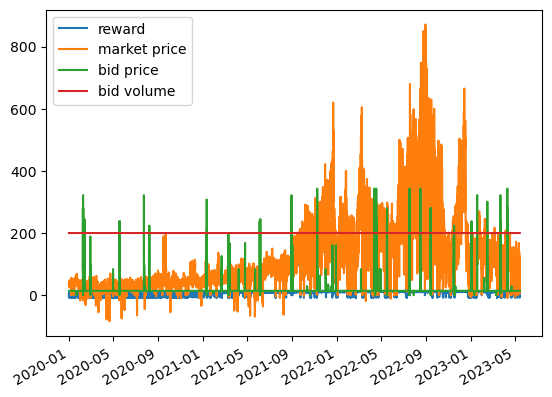

In [455]:
env.results_ep.plot()

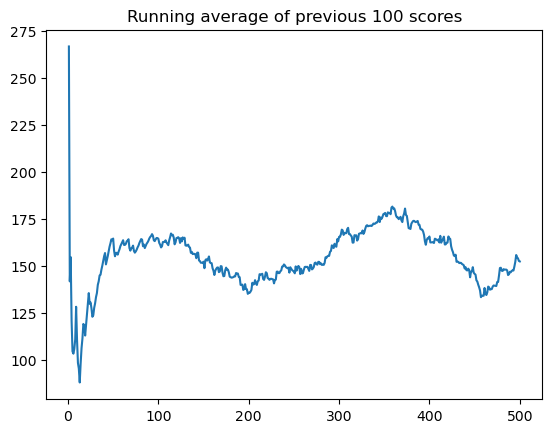

In [424]:
x = [i + 1 for i in range(len(score_history))]
plot_learning_curve(x, score_history)

In [408]:
score_history

[1250356.0,
 -20.0,
 0.0,
 301850.0,
 416120.0,
 1929480.0,
 2630.0,
 5858.0,
 1270.0,
 393072.0,
 769428.0,
 -1272.0,
 0.0,
 1989488.0,
 69838.0,
 -1818.0,
 210886.0,
 1245178.0,
 -3226.0,
 0.0,
 1240612.0,
 760.0,
 485136.0,
 80440.0,
 672.0,
 730950.0,
 -1196.0,
 0.0,
 212236.0,
 1824480.0,
 1986604.0,
 92008.0,
 840272.0,
 0.0,
 0.0,
 5370.0,
 240290.0,
 -1968.0,
 0.0,
 2328466.0,
 17884.0,
 426646.0,
 401056.0,
 1058196.0,
 1619414.0,
 1002626.0,
 197570.0,
 15400.0,
 13856.0,
 10186.0,
 0.0,
 451158.0,
 364054.0,
 0.0,
 2562306.0,
 686.0,
 1147052.0,
 0.0,
 236912.0,
 50050.0,
 -2994.0,
 74330.0,
 32526.0,
 130360.0,
 25734.0,
 3016370.0,
 0.0,
 455824.0,
 642264.0,
 1025804.0,
 23882.0,
 189608.0,
 6280.0,
 0.0,
 10700.0,
 637474.0,
 979878.0,
 13174.0,
 1632.0,
 1298580.0,
 7242.0,
 -268.0,
 35124.0,
 1761420.0,
 47774.0,
 16056.0,
 5498.0,
 4018.0,
 1452982.0,
 1700522.0,
 283748.0,
 1644660.0,
 444832.0,
 177018.0,
 574.0,
 0.0,
 141842.0,
 7320.0,
 10056.0,
 136402.0,
 7618.

In [361]:
state =  env.observe_state(df_demand_scaled.index[0])

In [362]:
state = torch.from_numpy(state).float()

In [364]:
_, probs = agent.model(state)
probs

tensor([0.0322, 0.1445, 0.0211, 0.0063, 0.0296, 0.0101, 0.2335, 0.3868, 0.1328,
        0.0033], grad_fn=<SoftmaxBackward0>)

In [357]:
action

array(5)

In [210]:
state = torch.from_numpy(state).float()
_, probs = self.model(state)
action_dist = torch.distributions.Categorical(probs=probs)
action = action_dist.sample()
self.action = action

24.0

In [171]:
state = torch.from_numpy(state).float()
_ , probs = agent.model(state)
action_dist = torch.distributions.Categorical(probs=probs)
action = action_dist.sample()



In [172]:
agent.model(state)

(tensor([-47.7459], grad_fn=<AddBackward0>),
 tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], grad_fn=<SoftmaxBackward0>))

In [397]:

0 / 10 * 2 * env.mc

0.0

In [398]:
50 / 10 * 2 * env.mc

300.0

In [227]:
state = torch.from_numpy(env.observation).float()
_, probs = agent.model(state)

In [243]:
agent = ActorCriticAgent(input_size, n_actions)

In [249]:
_, probs = agent.model(state)

In [245]:
import torch.nn.functional as F

tensor([-5186.8765,  1750.0256, -1454.3394,  3379.9880,   773.9310, -1769.9963,
          177.4805, -1122.4966,  -568.8074,  3021.6191],
       grad_fn=<AddBackward0>)

In [258]:
F.softmax(probs, dim=-1)

tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], grad_fn=<SoftmaxBackward0>)

In [180]:
observation = env.observe_state(env.date)

# get bid from action
bid_volume = env.capacity

# the bid price is relative to the marginal costs
bid_price = action / 10 * 2 * env.mc

profit, da_price = env.market_clearing(bid_price, bid_volume, env.date)

# scale the reward
reward = (profit / env.reward_scaling)

In [187]:
profi

array([11184.])

In [190]:
env.prices.loc[env.date]

85.92